In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=10,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
86/86 [==============================] - 412s 5s/step - loss: 0.6181 - accuracy: 0.6803 - val_loss: 0.4052 - val_accuracy: 0.8149
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
86/86 [==============================] - 355s 4s/step - loss: 0.3953 - accuracy: 0.8188 - val_loss: 0.3233 - val_accuracy: 0.8630
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/20
86/86 [==============================] - 352s 4s/step - loss: 0.3135 - accuracy: 0.8564 - val_loss: 0.2651 - val_accuracy: 0.8950
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/20
86/86 [==============================] - 365s 4s/step - loss: 0.2431 - accuracy: 0.8939 - val_loss: 0.2415 - val_accuracy: 0.9009
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/20
86/86 [==============================] - 358s 4s/step - loss: 0.1840 - accuracy: 0.9260 - val_loss: 0.2638 - val_accuracy: 0.8980
Epoch 6/20
86/86 [==============================] - 354s 4s/ste

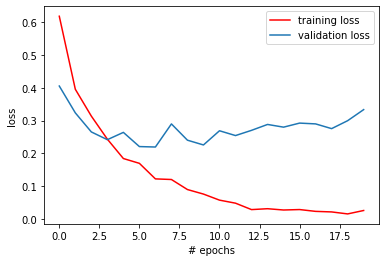

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

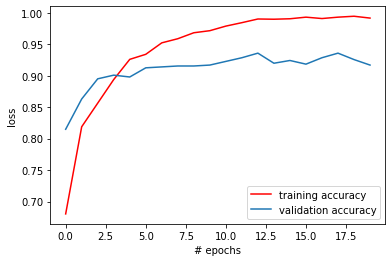

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

12/12 [==============================] - 8s 646ms/step - loss: 0.3688 - accuracy: 0.9186
[0.3687729835510254, 0.9186351895332336]
